In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

Getting Data ready for forecasting

In [2]:
df = pd.read_csv("DailyDelhiClimateTrain.csv")
df.head(10)

,date,meantemp,humidity,wind_speed,meanpressure
0,2013-01-01,10.000000,84.500000,0.000000,1015.666667
1,2013-01-02,7.400000,92.000000,2.980000,1017.800000
2,2013-01-03,7.166667,87.000000,4.633333,1018.666667
3,2013-01-04,8.666667,71.333333,1.233333,1017.166667
4,2013-01-05,6.000000,86.833333,3.700000,1016.500000
5,2013-01-06,7.000000,82.800000,1.480000,1018.000000
6,2013-01-07,7.000000,78.600000,6.300000,1020.000000
7,2013-01-08,8.857143,63.714286,7.142857,1018.714286
8,2013-01-09,14.000000,51.250000,12.500000,1017.000000
9,2013-01-10,11.000000,62.000000,7.400000,1015.666667


In [3]:
df.info() # checking the info on data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1462 entries, 0 to 1461
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   date          1462 non-null   object 
 1   meantemp      1462 non-null   float64
 2   humidity      1462 non-null   float64
 3   wind_speed    1462 non-null   float64
 4   meanpressure  1462 non-null   float64
dtypes: float64(4), object(1)
memory usage: 57.2+ KB


In [4]:
df['date'] = pd.to_datetime(df["date"]) # change the date to datetime format
df = df.sort_values('date').set_index('date') # also set the index as date

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1462 entries, 2013-01-01 to 2017-01-01
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   meantemp      1462 non-null   float64
 1   humidity      1462 non-null   float64
 2   wind_speed    1462 non-null   float64
 3   meanpressure  1462 non-null   float64
dtypes: float64(4)
memory usage: 57.1 KB


In [6]:
df.head(10)

,meantemp,humidity,wind_speed,meanpressure
date,,,,
2013-01-01,10.000000,84.500000,0.000000,1015.666667
2013-01-02,7.400000,92.000000,2.980000,1017.800000
2013-01-03,7.166667,87.000000,4.633333,1018.666667
2013-01-04,8.666667,71.333333,1.233333,1017.166667
2013-01-05,6.000000,86.833333,3.700000,1016.500000
2013-01-06,7.000000,82.800000,1.480000,1018.000000
2013-01-07,7.000000,78.600000,6.300000,1020.000000
2013-01-08,8.857143,63.714286,7.142857,1018.714286
2013-01-09,14.000000,51.250000,12.500000,1017.000000


Date starts at 2013-01-01  and ends at 2017-01-01
Total length is 1462 , data is on daily basis.

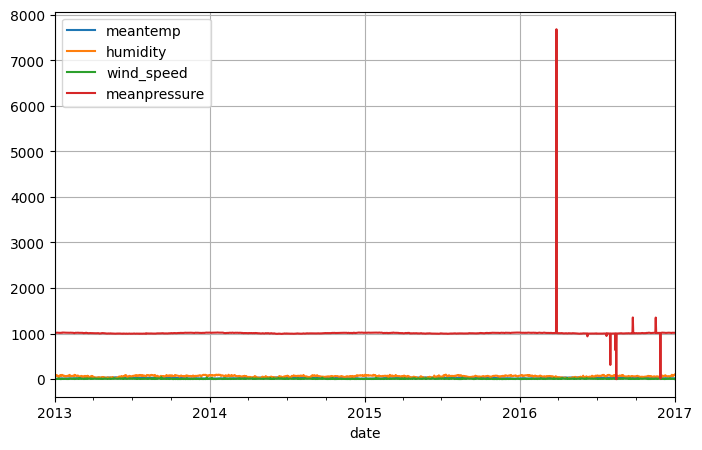

In [7]:
df['2013-01':'2017-01'].plot(grid=True,figsize=(8,5))
plt.show()
# no seasonality on the data what so ever


In [8]:
# monthly basis
df_monthly = df.resample('M').mean()
trend = df_monthly.rolling(12).mean() # for 12 months - set rolling to 12, this is rolling average


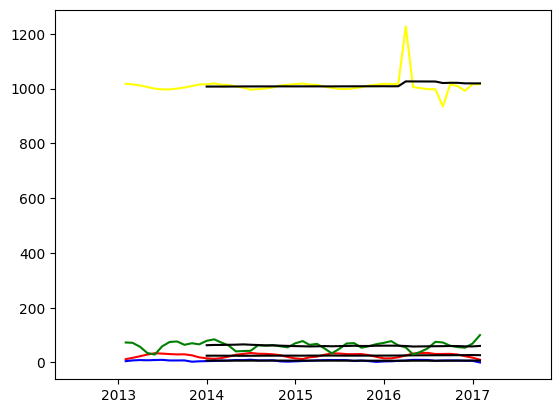

In [9]:
plt.plot(df_monthly.index,df_monthly["meantemp"],c="red",label="temp")
plt.plot(trend.index,trend["meantemp"],c="black"),
plt.plot(df_monthly.index,df_monthly["humidity"],c="green",label="humidity")
plt.plot(trend.index,trend["humidity"],c="black"),
plt.plot(df_monthly.index,df_monthly["wind_speed"],c="blue",label="wspeed"),
plt.plot(trend.index,trend["wind_speed"],c="black"),
plt.plot(df_monthly.index,df_monthly["meanpressure"],c="yellow",label="pressure"),
plt.plot(trend.index,trend["meanpressure"],c="black")
plt.margins(x=0.2)

Differencing on meanpressure to remove the seasonality on the end of the data

In [10]:
diff_data = df_monthly["meanpressure"].diff()

In [11]:
diff_data = diff_data.dropna()

In [12]:
from statsmodels.tsa.stattools import adfuller

In [13]:
# to check if differeincing worked on removing seasonality or not. we are looking for p-value less than 0.05
result = adfuller(diff_data.dropna())
print("ADF stats: ",result[0])
print("p-value ",result[1])
print("critical value",result[4])

ADF stats:  -4.192223044365014
p-value  0.0006791600579564212
critical value {'1%': -3.6209175221605827, '5%': -2.9435394610388332, '10%': -2.6104002410518627}


data is already stationary


Handling duplicates and null values. 

In [14]:
df = df.drop_duplicates() # dropped duplicates

In [15]:
df.isna().sum() # no null values

meantemp        0
humidity        0
wind_speed      0
meanpressure    0
dtype: int64

In [17]:
df.head(10)

,meantemp,humidity,wind_speed,meanpressure
date,,,,
2013-01-01,10.000000,84.500000,0.000000,1015.666667
2013-01-02,7.400000,92.000000,2.980000,1017.800000
2013-01-03,7.166667,87.000000,4.633333,1018.666667
2013-01-04,8.666667,71.333333,1.233333,1017.166667
2013-01-05,6.000000,86.833333,3.700000,1016.500000
2013-01-06,7.000000,82.800000,1.480000,1018.000000
2013-01-07,7.000000,78.600000,6.300000,1020.000000
2013-01-08,8.857143,63.714286,7.142857,1018.714286
2013-01-09,14.000000,51.250000,12.500000,1017.000000


Starting with SARIMA model to check for mae on single column and getting the MAE.
keeping in mind that the use parameter for SARIMA model is not cross validated and
used generic values for now. 

In [21]:
from statsmodels.tsa.arima.model import ARIMA

In [19]:
origin,start,end = "2013-01-01","2013-03-01","2013-05-01"
time_preiod = pd.date_range(start,end)
ser = df.loc[origin:end]['meantemp'].asfreq("D")
y_preds = []

In [23]:
for today in time_preiod.shift(-1):
    model = ARIMA(ser[origin:today],order=[1,0,0],seasonal_order=(0,1,1,7))
    model = model.fit()
    y_pred = model.forecast()[0]
    y_preds.append(y_pred)

    

C:\Users\manis\AppData\Local\Temp\ipykernel_8852\2214085072.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y_pred = model.forecast()[0]
C:\Users\manis\AppData\Local\Temp\ipykernel_8852\2214085072.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y_pred = model.forecast()[0]
C:\Users\manis\AppData\Local\Temp\ipykernel_8852\2214085072.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y_pred = model.forecast()[0]
C:\Users\mani

In [25]:
y_preds = pd.Series(y_preds,index=time_preiod)

In [26]:
y_preds

2013-03-01    19.096259
2013-03-02    15.494109
2013-03-03    18.479640
2013-03-04    18.687463
2013-03-05    17.145255
                ...    
2013-04-27    29.562027
2013-04-28    30.494850
2013-04-29    30.065273
2013-04-30    32.543515
2013-05-01    31.360615
Freq: D, Length: 62, dtype: float64

In [30]:
ser[time_preiod]

2013-03-01    17.333333
2013-03-02    19.000000
2013-03-03    19.333333
2013-03-04    17.600000
2013-03-05    20.875000
                ...    
2013-04-27    31.142857
2013-04-28    30.571429
2013-04-29    32.125000
2013-04-30    31.142857
2013-05-01    31.857143
Freq: D, Name: meantemp, Length: 62, dtype: float64

In [27]:
mae = (y_preds - ser[time_preiod]).abs().mean()

In [32]:
mae 
# this mae is considerd good enough for this purpose as 
# it is only off by max of 1.86 everytime on average

1.8616336876717605

1. Univariate RNN model, with no scaling. 


In [34]:
len(df)

1462

In [35]:
df.head(10)

,meantemp,humidity,wind_speed,meanpressure
date,,,,
2013-01-01,10.000000,84.500000,0.000000,1015.666667
2013-01-02,7.400000,92.000000,2.980000,1017.800000
2013-01-03,7.166667,87.000000,4.633333,1018.666667
2013-01-04,8.666667,71.333333,1.233333,1017.166667
2013-01-05,6.000000,86.833333,3.700000,1016.500000
2013-01-06,7.000000,82.800000,1.480000,1018.000000
2013-01-07,7.000000,78.600000,6.300000,1020.000000
2013-01-08,8.857143,63.714286,7.142857,1018.714286
2013-01-09,14.000000,51.250000,12.500000,1017.000000


In [36]:
df.tail(10)

,meantemp,humidity,wind_speed,meanpressure
date,,,,
2016-12-23,15.550000,74.700000,1.205000,1014.250000
2016-12-24,17.318182,78.636364,5.236364,1011.318182
2016-12-25,14.000000,94.300000,9.085000,1014.350000
2016-12-26,17.142857,74.857143,8.784211,1016.952381
2016-12-27,16.850000,67.550000,8.335000,1017.200000
2016-12-28,17.217391,68.043478,3.547826,1015.565217
2016-12-29,15.238095,87.857143,6.000000,1016.904762
2016-12-30,14.095238,89.666667,6.266667,1017.904762
2016-12-31,15.052632,87.000000,7.325000,1016.100000


In [37]:
#Data preparation for univariate forecasting,since the data has no seasonality
#No order of differencing is done in this case as mentioned above. 
#input and output sequence preparation. 
#baseline MAE is of 1.86 
train_df = df['meantemp']["2013-01-01":"2015-12-31"]
valid_df = df['meantemp']["2016-01-01":"2017-01-01"]

In [39]:
print(f"Train length {len(train_df)} \nValid length {len(valid_df)}")

Train length 1095 
Valid length 367


In [40]:
seq_length = 100 
train_ds = tf.keras.utils.timeseries_dataset_from_array(
    train_df.to_numpy(),
    targets = train_df[seq_length:],
    sequence_length = seq_length,
    batch_size = 32,
    shuffle = True,
    seed =42
)
valid_ds = tf.keras.utils.timeseries_dataset_from_array(
    valid_df.to_numpy(),
    targets = valid_df[seq_length:],
    sequence_length = seq_length,
    batch_size = 32
)

In [62]:
for inputs,targets in train_ds:
    print(f"Input shape {inputs.shape},Target Shape {targets.shape}")
    break

Input shape (32, 100),Target Shape (32,)


In [42]:
model = tf.keras.Sequential([
    tf.keras.layers.SimpleRNN(32,return_sequences=True,input_shape=[None,1]),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.SimpleRNN(32,return_sequences=True),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.SimpleRNN(32),
    tf.keras.layers.Dense(1)
])

c:\Users\manis\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [65]:
# utility function which is going to be cross validated for best hyper parameter. 
early_stopping_cb = tf.keras.callbacks.EarlyStopping(
        monitor="val_mae", patience=50, restore_best_weights=True)
opt = tf.keras.optimizers.SGD(learning_rate=0.05, momentum=0.9)
model.compile(loss=tf.keras.losses.Huber(), optimizer=opt, metrics=["mae"])
history = model.fit(train_ds, validation_data=valid_ds, epochs=250,
                        callbacks=[early_stopping_cb])
valid_loss, valid_mae = model.evaluate(valid_ds)

Epoch 1/250
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 5.9116 - mae: 6.3935 - val_loss: 4.0773 - val_mae: 4.5407
Epoch 2/250
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 6.1105 - mae: 6.5891 - val_loss: 6.2976 - val_mae: 6.7894
Epoch 3/250
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 5.7677 - mae: 6.2531 - val_loss: 4.9985 - val_mae: 5.4889
Epoch 4/250
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 5.5467 - mae: 6.0286 - val_loss: 4.3190 - val_mae: 4.8036
Epoch 5/250
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 5.7594 - mae: 6.2431 - val_loss: 4.8035 - val_mae: 5.2910
Epoch 6/250
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 5.6782 - mae: 6.1617 - val_loss: 4.0716 - val_mae: 4.5491
Epoch 7/250
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 5.8966 - mae: 6.3777 - val_loss: 4.0509 - val_mae: 4.5274
Epoch 8/250
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 5.7867 - mae: 6.2695 - val_loss: 4.7662 - val_mae: 5.2535
Epoch 9/250
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - lo

In [66]:
print(f"Valid loss {valid_loss} , Valid MAE {valid_mae}")
# This is lot more than what i got using SARIMA model. 
# Cross validation is needed to get the best hyper param for best less MAE and loss

Valid loss 3.9029884338378906 , Valid MAE 4.3621978759765625


Multivaritate RNN model with Scaling. 

In [89]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler

In [90]:
standard_scale = StandardScaler()
robust_scale = RobustScaler()

In [72]:
#using cyclical encoding or circular feature engineering to capture seasonal or
# periodic patterns. 
# This key benefits is generated by AI. 
# Captures Periodicity:
# 1. Converts cyclical time features (like hours, days, months) into continuous circular values
# 2. Preserves the cyclical nature of time (e.g., December 31st is close to January 1st)
# Key Benefits:
# 1. Handles the "wrap-around" problem of time cycles
# 2. Prevents artificial discontinuities in the data
# 3. Helps models learn seasonal patterns more effectively

In [93]:
df["seconds"] = df.index.map(pd.Timestamp.timestamp)

In [94]:
day =  86400
year = (365.2425) * day
df['year_sin'] = np.sin(df['seconds'] * (2 * np.pi / year))
df['year_cos'] = np.cos(df["seconds"] * (2 * np.pi/ year))
df.drop(columns="seconds",inplace=True)

In [95]:
# no scaling
mv_train = df.iloc[:1140]
mv_valid = df.iloc[1140:1250]
mv_test = df.iloc[1250:]

# robust scaling
mv_train_rb = df.iloc[:1140]
mv_valid_rb = df.iloc[1140:1250]
mv_test_rb = df.iloc[1250:]

#standard scaling
mv_train_ss = df.iloc[:1140]
mv_valid_ss = df.iloc[1140:1250]
mv_test_ss = df.iloc[1250:]



In [96]:
# test 1 with robust scalar
for col in mv_train.columns[0:4]:
    mv_train_rb[col] = robust_scale.fit_transform(mv_train_rb[[col]])
    mv_valid_rb[col] = robust_scale.transform(mv_valid_rb[[col]])
    mv_test_rb[col] = robust_scale.transform(mv_test_rb[[col]])

# test 2 with standard scalar
for col in mv_train.columns[0:4]:
    mv_train_ss[col] = standard_scale.fit_transform(mv_train_ss[[col]])
    mv_valid_ss[col] = standard_scale.transform(mv_valid_ss[[col]])
    mv_test_ss[col] = standard_scale.transform(mv_test_ss[[col]])


C:\Users\manis\AppData\Local\Temp\ipykernel_8852\3625487429.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mv_train_rb[col] = robust_scale.fit_transform(mv_train_rb[[col]])
C:\Users\manis\AppData\Local\Temp\ipykernel_8852\3625487429.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mv_valid_rb[col] = robust_scale.transform(mv_valid_rb[[col]])
C:\Users\manis\AppData\Local\Temp\ipykernel_8852\3625487429.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Tr

In [98]:
mv_train.columns

Index(['meantemp', 'humidity', 'wind_speed', 'meanpressure', 'year_sin',
       'year_cos'],
      dtype='object')

In [144]:
# input and target sequences
seq = 14
train_ds = tf.keras.utils.timeseries_dataset_from_array(
    mv_train.to_numpy(),
    targets = mv_train[["meantemp","humidity","wind_speed","meanpressure"]][seq_length:],
    sequence_length = seq_length,
    batch_size = 32,
    shuffle = True,
    seed = 42    
)
valid_ds = tf.keras.utils.timeseries_dataset_from_array(
    mv_valid.to_numpy(),
    targets = mv_valid[["meantemp","humidity","wind_speed","meanpressure"]][seq_length:],
    sequence_length = seq_length,
    batch_size = 32
)
train_ds_rb = tf.keras.utils.timeseries_dataset_from_array(
    mv_train_rb.to_numpy(),
    targets = mv_train_rb[["meantemp","humidity","wind_speed","meanpressure"]][seq_length:],
    sequence_length = seq_length,
    batch_size = 32,
    shuffle = True,
    seed = 42    
)
valid_ds_rb = tf.keras.utils.timeseries_dataset_from_array(
    mv_valid_rb.to_numpy(),
    targets = mv_valid_rb[["meantemp","humidity","wind_speed","meanpressure"]][seq_length:],
    sequence_length = seq_length,
    batch_size = 32
)
train_ds_ss = tf.keras.utils.timeseries_dataset_from_array(
    mv_train_ss.to_numpy(),
    targets = mv_train_ss[["meantemp","humidity","wind_speed","meanpressure"]][seq_length:],
    sequence_length = seq_length,
    batch_size = 32,
    shuffle = True,
    seed = 42    
)
valid_ds_ss = tf.keras.utils.timeseries_dataset_from_array(
    mv_valid_ss.to_numpy(),
    targets = mv_valid_ss[["meantemp","humidity","wind_speed","meanpressure"]][seq_length:],
    sequence_length = seq_length,
    batch_size = 32
)
test_ds_ss = tf.keras.utils.timeseries_dataset_from_array(
    mv_test_ss.to_numpy(),
    targets = mv_test_ss[["meantemp","humidity","wind_speed","meanpressure"]][seq_length:],
    sequence_length = seq_length,
    batch_size = 32
)

In [100]:
for inputs, targets in train_ds:
    print(inputs.shape, targets.shape)
    break

(32, 100, 6) (32, 4)


In [103]:
model2 = tf.keras.Sequential([
    tf.keras.layers.LSTM(128,return_sequences=True,input_shape=[None,6]),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.LSTM(64, return_sequences=True),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.LSTM(32),
    tf.keras.layers.Dense(8,activation="relu"),
    tf.keras.layers.Dense(4,activation="linear")
])

In [105]:
# summary of the entire model
model2.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_5 (LSTM)                   │ (None, None, 128)      │        69,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, None, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_6 (LSTM)                   │ (None, None, 64)       │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, None, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_7 (LSTM)                   │ (None, 32)             │        12,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 8)              │           264 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 4)              │            36 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 131,244 (512.67 KB)

 Trainable params: 131,244 (512.67 KB)

 Non-trainable params: 0 (0.00 B)

In [106]:
from tensorflow.keras.callbacks import ModelCheckpoint

In [118]:
# saving the best version of model and compiling the model.
cp = ModelCheckpoint('model2_rnn.keras',save_best_only=True)
cp1 = ModelCheckpoint('model3_rnn.keras',save_best_only=True)
cp2 = ModelCheckpoint('model4_rnn.keras',save_best_only=True)

In [110]:
model2.compile(loss='mae',optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),metrics=[tf.keras.metrics.RootMeanSquaredError()])

In [111]:
model2.fit(train_ds,validation_data=valid_ds,epochs=100,callbacks=[cp])

Epoch 1/250
33/33 ━━━━━━━━━━━━━━━━━━━━ 6s 94ms/step - loss: 275.3690 - root_mean_squared_error: 505.0646 - val_loss: 272.6889 - val_root_mean_squared_error: 501.0229
Epoch 2/250
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 66ms/step - loss: 275.1745 - root_mean_squared_error: 504.8443 - val_loss: 272.4534 - val_root_mean_squared_error: 500.7474
Epoch 3/250
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 61ms/step - loss: 274.8464 - root_mean_squared_error: 504.6274 - val_loss: 272.0196 - val_root_mean_squared_error: 500.4282
Epoch 4/250
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 62ms/step - loss: 274.5157 - root_mean_squared_error: 504.3349 - val_loss: 271.5392 - val_root_mean_squared_error: 500.0262
Epoch 5/250
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 61ms/step - loss: 273.8570 - root_mean_squared_error: 503.8522 - val_loss: 271.1317 - val_root_mean_squared_error: 499.6719
Epoch 6/250
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 60ms/step - loss: 273.5047 - root_mean_squared_error: 503.4601 - val_loss: 270.7796 - val_root_mean_squared_error: 499.4061
Epoc

In [119]:
model2.fit(train_ds_rb,validation_data=valid_ds_rb,epochs=100,callbacks=[cp1])

Epoch 1/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 58ms/step - loss: 11.7361 - root_mean_squared_error: 29.8565 - val_loss: 0.9703 - val_root_mean_squared_error: 1.0794
Epoch 2/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 63ms/step - loss: 0.6541 - root_mean_squared_error: 0.8292 - val_loss: 0.9544 - val_root_mean_squared_error: 1.0616
Epoch 3/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 61ms/step - loss: 0.6477 - root_mean_squared_error: 0.8240 - val_loss: 0.9310 - val_root_mean_squared_error: 1.0372
Epoch 4/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 62ms/step - loss: 0.6375 - root_mean_squared_error: 0.8092 - val_loss: 0.9073 - val_root_mean_squared_error: 1.0129
Epoch 5/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 63ms/step - loss: 0.6177 - root_mean_squared_error: 0.7805 - val_loss: 0.8829 - val_root_mean_squared_error: 0.9880
Epoch 6/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 60ms/step - loss: 0.6172 - root_mean_squared_error: 0.7819 - val_loss: 0.8566 - val_root_mean_squared_error: 0.9613
Epoch 7/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 58ms/ste

In [122]:
model2.fit(train_ds_ss,validation_data=valid_ds_ss,epochs=100,callbacks=[cp2])

Epoch 1/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 64ms/step - loss: 0.5696 - root_mean_squared_error: 0.7546 - val_loss: 0.6220 - val_root_mean_squared_error: 0.7535
Epoch 2/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 62ms/step - loss: 0.5265 - root_mean_squared_error: 0.7157 - val_loss: 0.6192 - val_root_mean_squared_error: 0.7694
Epoch 3/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 65ms/step - loss: 0.5267 - root_mean_squared_error: 0.7276 - val_loss: 0.6116 - val_root_mean_squared_error: 0.7625
Epoch 4/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 66ms/step - loss: 0.5162 - root_mean_squared_error: 0.7103 - val_loss: 0.6147 - val_root_mean_squared_error: 0.7646
Epoch 5/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 68ms/step - loss: 0.5120 - root_mean_squared_error: 0.6922 - val_loss: 0.6182 - val_root_mean_squared_error: 0.7675
Epoch 6/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 64ms/step - loss: 0.5086 - root_mean_squared_error: 0.6996 - val_loss: 0.6137 - val_root_mean_squared_error: 0.7609
Epoch 7/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 62ms/step 

In [115]:
valid_loss, valid_mae = model2.evaluate(valid_ds) # very high loss and rmse on unsacled data which is common

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - loss: 218.5543 - root_mean_squared_error: 419.9401


In [121]:
valid_loss_rb, valid_mae_rb = model2.evaluate(valid_ds_rb) # good progress with loss and rmse

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - loss: 0.4406 - root_mean_squared_error: 0.5512


In [124]:
valid_loss_ss, valid_mae_ss = model2.evaluate(valid_ds_ss) # bit higher than robust scalar but okay for this. 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 0.5640 - root_mean_squared_error: 0.6919


In [133]:
inp = []
tar = []
for inputs, targets in train_ds_ss:
    inp.append(inputs)
    tar.append(targets)

In [145]:
inputs_tensor = tf.concat(inp, axis=0)
targets_tensor = tf.concat(tar, axis=0)

In [146]:
train_preds = model2.predict(inputs_tensor)

33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step


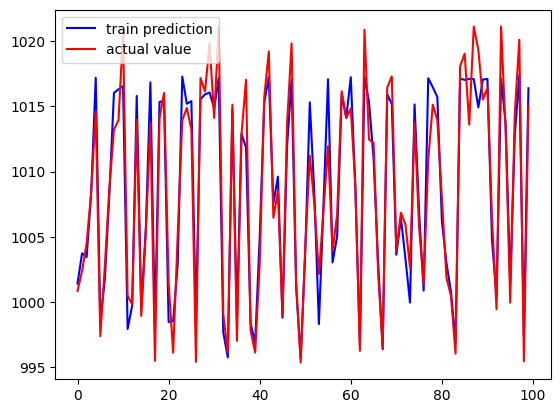

In [148]:
plt.plot(standard_scale.inverse_transform(tf.reshape(train_preds[:, 0], (-1, 1)))[:100], c='blue', label='train prediction')
plt.plot(standard_scale.inverse_transform(tf.reshape(targets_tensor[:, 0], (-1, 1)))[:100], c="red", label="actual value")
plt.legend()
plt.show()


In [150]:
inp_test = []
tar_test = []
for inputs, targets in train_ds_ss:
    inp_test.append(inputs)
    tar_test.append(targets)
inputs_tensor_test = tf.concat(inp_test, axis=0)
targets_tensor_test = tf.concat(tar_test, axis=0)

In [151]:
test_pred = model2.predict(inputs_tensor_test)

33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step


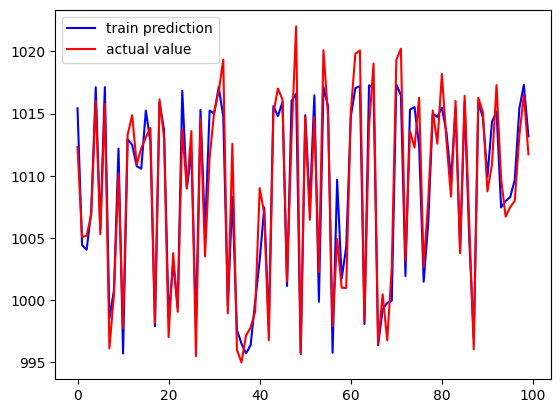

In [152]:
plt.plot(standard_scale.inverse_transform(tf.reshape(test_pred[:, 0], (-1, 1)))[:100], c='blue', label='train prediction')
plt.plot(standard_scale.inverse_transform(tf.reshape(targets_tensor_test[:, 0], (-1, 1)))[:100], c="red", label="actual value")
plt.legend()
plt.show()


In [153]:
pred_value = standard_scale.inverse_transform(tf.reshape(test_pred[:, 0], (-1, 1)))
target_value = standard_scale.inverse_transform(tf.reshape(targets_tensor_test[:,0],(-1,1)))

In [159]:
from sklearn.metrics import mean_absolute_error,r2_score

In [160]:
print(f"Mean Absloute Error : {mean_absolute_error(target_value,pred_value)} \nAccuracy Score {r2_score(target_value,pred_value)}")

Mean Absloute Error : 1.5537284374711728 
Accuracy Score 0.9274755894772814


our baseline for time series forecasting using SARIMA was 1.8 MAE and with using standard scalar and deep RNN to forecast we get a MAE of 1.55 which is better than that of SARIMA. 
Also, the r2 score for this model is 0.92 meaning 92% accurate forecasting on provided data. 

In [156]:
# further validation for hyper parameter might also help with this but for now.
# this is the end of this project. 